In [1]:
#trainning the hidden dataset
#importing python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [2]:
#corealtion matrix of baseline
df_combined_baseline = pd.read_parquet("baseline set with all neg and 100 pos.parquet")
features_combined_baseline = df_combined_baseline .drop(columns=['object'])
corr_combined_baseline = features_combined_baseline.corr()

In [3]:
#hidden dataset
df_hidden_positives=pd.read_csv('Positive_hidden_subset_39.csv')
df_hidden_negatives=pd.read_parquet('remaining_negative_subset.parquet')

In [4]:
#rest of 1471 biggie dataset
df_hidden_negatives

,object,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,...,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K,cluster,cluster_id
0,ZTF18aawacoh,16.921257,16.508486,0.927426,17.339954,2.078099,0.298969,0.207789,2.534733,-0.074856,...,0.348160,0.450353,3.214781,0.054808,138.090204,3115.599350,-1.071508,0.879249,10,10
1,ZTF18aayecqh,14.138779,14.135098,0.089374,14.111984,0.539448,0.323249,0.321063,0.237618,2.982943,...,0.042022,0.578518,0.860973,0.006321,111.253077,27.973991,1.043426,0.794772,1,1
2,ZTF18aayedvx,14.344487,14.342129,0.193407,14.387081,0.587102,0.279716,0.211211,0.489042,0.055415,...,0.098971,0.107415,0.729249,0.013483,30.566166,134.877339,-0.556790,0.818449,1,1
3,ZTF18aawkmkc,15.095712,15.092181,0.171978,15.060401,0.471860,0.428186,0.112233,0.451537,-1.213320,...,0.139129,0.143089,0.630498,0.011392,49.650705,159.811657,0.312379,0.884591,1,1
4,ZTF18aawacbm,16.070053,16.058632,0.221727,16.135805,0.731493,0.313725,0.192081,0.616687,0.138785,...,0.108663,0.363834,0.808481,0.013798,66.933369,181.022023,-0.942469,0.794955,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,ZTF18aauemmw,13.895007,13.897449,0.128070,13.898702,0.448988,0.321894,0.185626,0.304910,-0.119662,...,0.098581,0.182567,0.581998,0.009217,35.746496,55.153504,0.133804,0.848979,1,1
767,ZTF18aaxmyik,16.437508,16.409775,0.244637,16.332657,0.747887,0.305990,0.301779,0.580731,-1.080556,...,0.127987,0.130599,0.827061,0.014883,99.800570,244.122242,0.520532,0.901653,1,1
768,ZTF18aavyoqh,15.844194,15.827634,0.241755,15.923851,0.642462,0.297937,0.077261,0.577784,-0.121954,...,0.143333,0.213730,0.802957,0.015258,76.008036,259.106384,-0.813706,0.835711,1,1
769,ZTF18abfxhdt,14.378358,14.377502,0.140841,14.315447,0.617106,0.215148,0.303501,0.384504,2.452980,...,0.038797,0.592206,1.029574,0.009795,124.925376,72.940812,1.441337,0.775064,1,1


In [5]:
# Combine to make baseline set
combined = pd.concat([df_hidden_positives, df_hidden_negatives])
# Shuffle the combined dataset
combined = combined.sample(frac=1, random_state=42).reset_index(drop=True)
combined.to_parquet("baseline set with hidden neg and pos.parquet", index=False)

print("Combined and shuffled dataset saved")
print("Total rows:", len(combined))

Combined and shuffled dataset saved
Total rows: 810


In [6]:
#corealtion matrix of remaining data
df_hidden_dataset = pd.read_parquet("baseline set with hidden neg and pos.parquet")
features_hidden_dataset = df_hidden_dataset .drop(columns=['object','cluster','cluster_id'])
corr_hidden_dataset= features_hidden_dataset.corr()

In [7]:
#featuture comparison
corr_diff = (corr_combined_baseline-corr_hidden_dataset) #correlation run

In [8]:
#for better tolerance of corr matrix
corr_diff_clean = corr_diff.copy()
corr_diff_clean[np.abs(corr_diff_clean) < 1e-3] = 0

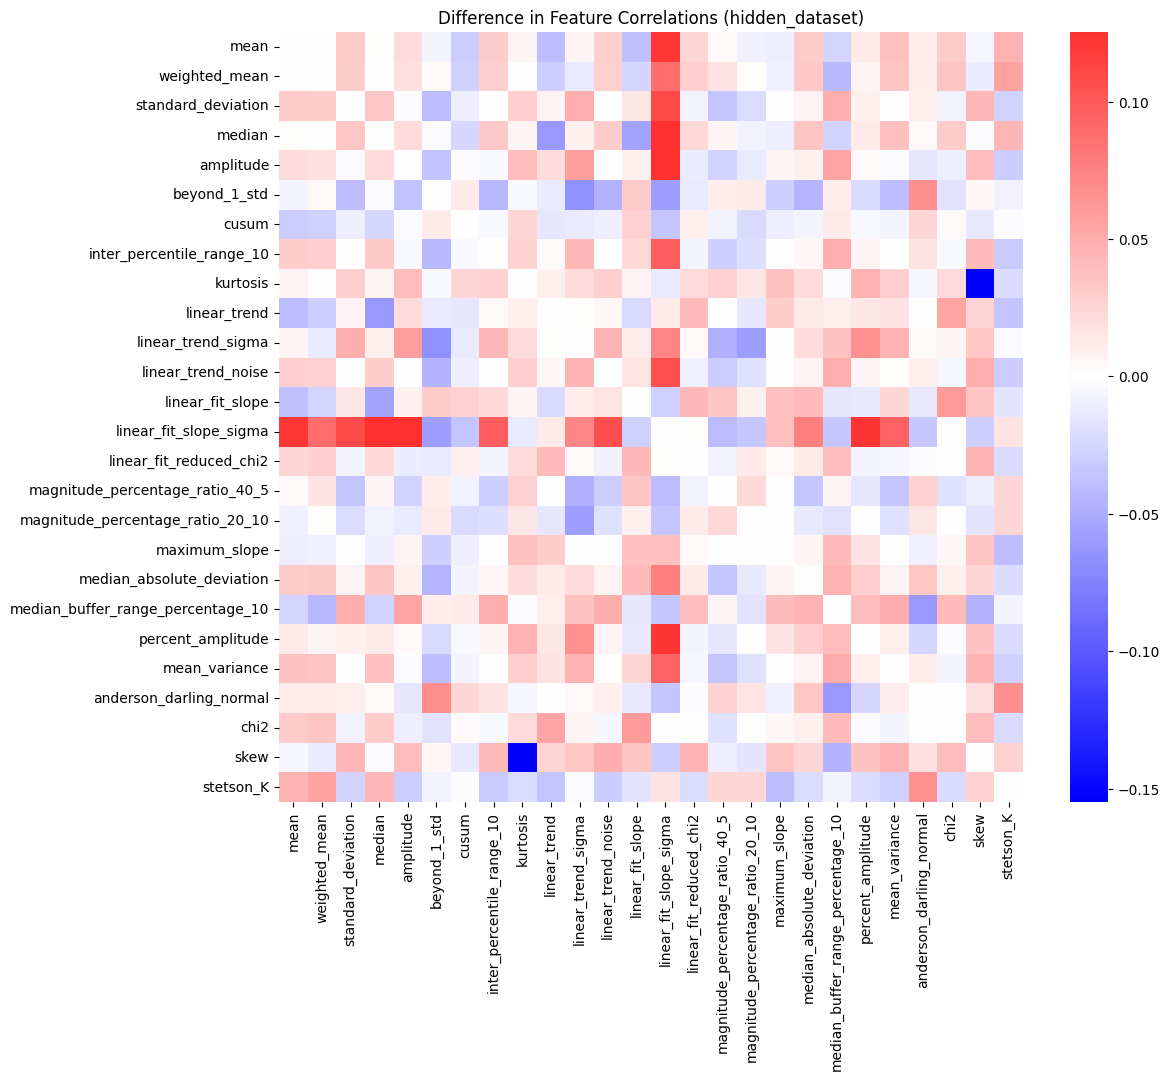

In [9]:
#plotting difference matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff_clean, cmap='bwr', center=0)#, vmin=-0.5, vmax=0.5)
plt.title('Difference in Feature Correlations (hidden_dataset)')
#plt.tight_layout()
plt.show()

In [10]:
#loading dataset
df=pd.read_parquet('baseline set with hidden neg and pos.parquet')

In [11]:
df

,object,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,...,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K,cluster,cluster_id
0,ZTF18ablvrmq,15.651901,15.421497,1.044219,15.604795,2.452979,0.306220,0.185164,2.853347,-0.501001,...,0.787672,0.246753,2.520415,0.066715,13.765612,2003.768236,0.213364,0.839808,-1.0,None
1,ZTF18aawkncs,14.875963,14.876442,0.108252,14.857052,0.457320,0.325323,0.223964,0.273802,1.351842,...,0.076318,0.353358,0.708630,0.007277,46.872525,48.847059,1.005513,0.785914,1.0,1
2,ZTF18ablwzaf,15.547452,15.381345,1.034187,15.684816,2.098594,0.416780,0.239127,2.981355,-0.873097,...,0.652842,0.195089,2.441296,0.066518,35.914556,2398.745842,-0.352372,0.867736,-1.0,None
3,ZTF18aaxjcxd,17.595574,16.972510,0.992409,18.072931,2.062415,0.427778,0.263984,2.519696,-1.132719,...,0.756629,0.355556,2.348641,0.056401,67.112400,1275.684763,-0.074977,0.948695,-1.0,None
4,ZTF18abaqbzy,17.768075,17.683088,0.330559,17.718870,0.903527,0.263965,0.314342,0.870911,0.569928,...,0.246017,0.319277,1.405636,0.018604,72.471907,115.745384,1.108105,0.812953,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,ZTF18abfjmbl,16.087413,16.085389,0.086521,16.053020,0.543823,0.349215,0.395872,0.218258,1.683706,...,0.052219,0.517596,0.744381,0.005378,64.653136,32.439946,0.706887,0.869402,1.0,1
806,ZTF18aaxdlin,12.980505,12.981014,0.144279,12.994953,1.064847,0.247336,0.294478,0.303287,8.080479,...,0.079642,0.605721,1.498762,0.011115,18.793753,93.884149,1.161383,0.757284,1.0,1
807,ZTF17aadkjbo,16.452748,16.313517,0.484654,16.179920,1.407386,0.226140,0.295404,0.997578,1.436822,...,0.066538,0.607295,2.474609,0.029457,165.293528,680.192296,1.452276,0.826429,-1.0,None
808,ZTF19aasruih,14.807844,14.807427,0.047660,14.792824,0.501991,0.211574,0.128653,0.118833,13.355089,...,0.015223,0.801592,0.644070,0.003219,209.964353,18.266892,1.745565,0.714605,-1.0,None


In [12]:
#stepping forward with useful numerical data only
X = df.drop(columns=['object','cluster', 'cluster_id']).values

In [13]:
# object column contains names like 'ZTF18abc...' or non-ZTF names : Binary conversion of objects
y = np.where(df['object'].str.contains('ZTF', case=False),
             -1,   # ZTF → negative
              1)   # non-ZTF → positive

In [14]:
#run accuracy
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
)

final_model= RandomForestClassifier(
    n_estimators=60,
    class_weight="balanced",
   
)

final_model.fit(X_train, y_train)

test_accuracy = final_model.score(X_test, y_test)
print("\nFinal test accuracy:", test_accuracy)



Final test accuracy: 0.9567901234567902


In [15]:
#measuring robustness through 5-fold cross-validation.
scores = cross_val_score(
    final_model,
    X,
    y,
    cv=5
)

print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())
print("Std CV accuracy:", scores.std())


Cross-validation scores: [0.97530864 0.96296296 0.95061728 0.95061728 0.96296296]
Mean CV accuracy: 0.9604938271604938
Std CV accuracy: 0.009238660214256638


In [16]:
#Train the Random Forest classifier
clf = RandomForestClassifier(
    n_estimators=60,      # number of trees in my forest
    #random_state=None,     # different forest each run
)

clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=60)

In [17]:
# Check class probabilities for the test set.
# predict_proba returns an array of shape (N_test, 2),
# where N_test is the number of test objects.
# Column 0 → probability of class -1 (negative, ZTF)
# Column 1 → probability of class +1 (positive, non-ZTF)
probs = clf.predict_proba(X_test)
print('probs',probs)

probs [[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.98333333 0.01666667]
 [0.76666667 0.23333333]
 [0.98333333 0.01666667]
 [1.         0.        ]
 [0.91666667 0.08333333]
 [1.         0.        ]
 [1.         0.        ]
 [0.98333333 0.01666667]
 [1.         0.        ]
 [0.98333333 0.01666667]
 [0.98333333 0.01666667]
 [1.         0.        ]
 [1.         0.        ]
 [0.88333333 0.11666667]
 [0.2        0.8       ]
 [0.95       0.05      ]
 [0.98333333 0.01666667]
 [1.         0.        ]
 [0.98333333 0.01666667]
 [0.98333333 0.01666667]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.98333333 0.01666667]
 [0.95       0.05      ]
 [1.         0.        ]
 [0.98333333 0.01666667]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.96666667 0.03333333]
 [0.55       0.45      ]
 [0.98333333 0.01666667]
 [0.95       0.05      ]
 [1.         0.    

Confusion matrix (raw counts):
[[154   1]
 [  5   2]]


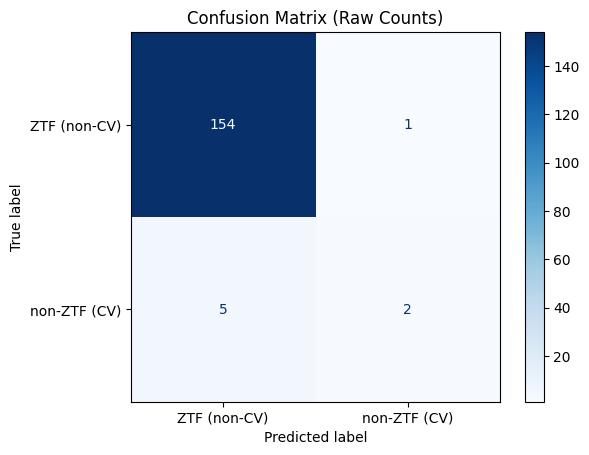

In [18]:
# CONFUSION MATRIX + TP / TN / FP / FN IDENTIFICATION
# Class labels for clarity
#for untrained dataset
class_names = ["ZTF (non-CV)", "non-ZTF (CV)"]

# Plot confusion matrix (raw counts)
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=class_names,
    cmap=plt.cm.Blues #heatmap
)

disp.ax_.set_title("Confusion Matrix (Raw Counts)")
print("Confusion matrix (raw counts):")
print(disp.confusion_matrix)

plt.show()


# Extract TN, FP, FN, TP explicitly
# Label convention used in YOUR code:
#   -1 → ZTF (negative, non-CV)
#   +1 → non-ZTF (positive, CV)

cm = confusion_matrix(y_test, clf.predict(X_test), labels=[-1, 1])

TN, FP, FN, TP = cm.ravel()




In [19]:

#now we'll run a step-by-step code to implement most accurate number os trees in my random(n_estimator value) and test train split(test_size)
train_sizes = np.arange(0.5, 0.91, 0.01)          # 50% to 90% test_size
n_estimators_list = np.arange(10, 151, 10)         # 10 to 150 trees


In [20]:
results = []

for size_train in train_sizes:

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        train_size=size_train,
        shuffle=True,
    )
#generating random array
    
    y_random = np.random.choice(
        np.unique(y),
        size=len(y_test),
        replace=True
    )
    random_acc = accuracy_score(y_test, y_random)

    for n in n_estimators_list:

        # Random Forest fitting
        clf = RandomForestClassifier(
            n_estimators=n,
            class_weight="balanced",  
            n_jobs=-1
        )

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        rf_acc = accuracy_score(y_test, y_pred)

        # saved results
        results.append({
            "n_estimators": n,
            "size_train": size_train,
            "random_acc": random_acc,
            "rf_acc": rf_acc
        })


In [21]:
df = pd.DataFrame(results)
df.head()

,n_estimators,size_train,random_acc,rf_acc
0,10,0.5,0.518519,0.948148
1,20,0.5,0.518519,0.955556
2,30,0.5,0.518519,0.955556
3,40,0.5,0.518519,0.955556
4,50,0.5,0.518519,0.953086


In [22]:
best_row = df.loc[df["rf_acc"].idxmax()]

best_train_size = best_row["size_train"]
best_n_estimators = best_row["n_estimators"]
best_accuracy = best_row["rf_acc"]

print("Best configuration:")
print(f"Train size      : {best_train_size}")
print(f"n_estimators    : {best_n_estimators}")
print(f"Test accuracy   : {best_accuracy:.4f}")


Best configuration:
Train size      : 0.8900000000000003
n_estimators    : 40.0
Test accuracy   : 1.0000


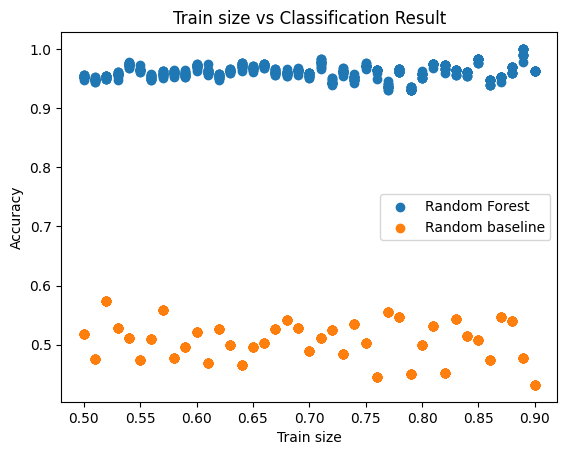

In [23]:
# Ensure 1D numeric arrays
x_train_size = df['size_train'].to_numpy()
rf_acc = df['rf_acc'].to_numpy()
y_random = df['random_acc'].to_numpy()  
#X-axis: train size, Y-axis: classification results
# Plot
plt.figure()
plt.scatter(x_train_size, rf_acc, marker='o', label='Random Forest')
plt.scatter(x_train_size, y_random, marker='o', label='Random baseline')
plt.xlabel('Train size')
plt.ylabel('Accuracy')
plt.title('Train size vs Classification Result')
plt.legend()
plt.show()


In [24]:
#run accuracy
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.15,  #ml has tendency to take larger data for training and less of test,as it gave best train size ~90% went with 80~20 proportion
)

final_model = RandomForestClassifier(
    n_estimators=20,
    class_weight="balanced",
   
)

final_model.fit(X_train, y_train)

test_accuracy = final_model.score(X_test, y_test)
print("\nFinal test accuracy:", test_accuracy)



Final test accuracy: 0.9754098360655737


Confusion matrix (raw counts):
[[118   0]
 [  3   1]]


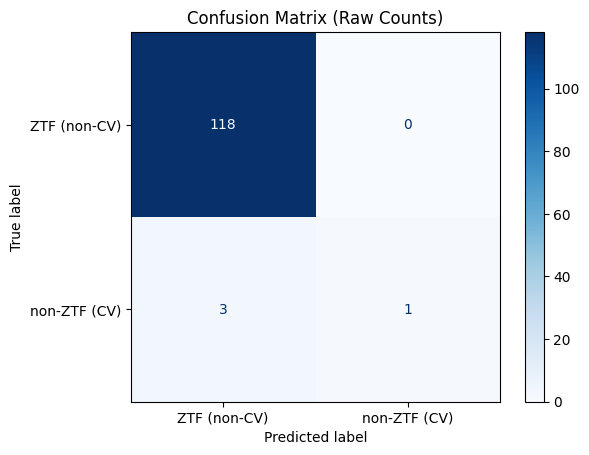

In [25]:
# CONFUSION MATRIX + TP / TN / FP / FN IDENTIFICATION
# Class labels for clarity
class_names = ["ZTF (non-CV)", "non-ZTF (CV)"]

# Plot confusion matrix (raw counts)
disp = ConfusionMatrixDisplay.from_estimator(
   final_model,
    X_test,
    y_test,
    display_labels=class_names,
    cmap=plt.cm.Blues #heatmap
)

disp.ax_.set_title("Confusion Matrix (Raw Counts)")
print("Confusion matrix (raw counts):")
print(disp.confusion_matrix)

plt.show()


# Extract TN, FP, FN, TP explicitly
# Label convention used in YOUR code:
#   -1 → ZTF (negative, non-CV)
#   +1 → non-ZTF (positive, CV)

cm = confusion_matrix(y_test, clf.predict(X_test), labels=[-1, 1])

TN, FP, FN, TP = cm.ravel()


